## Iris Flower Species Prediction

In [3]:
# Edit all the Markdown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Kendra Ling

**Course:** CISD 43 – Big Data (Spring, 2025)

### Problem Statement
* This project  is about iris flower species predictions based on petal and sepal dimensions of widths and lengths.
    
* **Keywords:** Species predictions, KNN Classification, k-Means Clustering

### Required packages

* Add instructions to install the required packages


In [7]:
## Your code begins here
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Methodology

1. Explain your big data metodology

The iris dataset is was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems. 
Users can also access this dataset within the UCI Machine Learning Repository.
There are 3 total species - virginica, setosa, and versicolor. The petal and sepal lengths are both provided in cm. 
There was no handling of missing values required.


Histograms were created before and after scaling to observe distribution changes across iris features.
A scatter plot was used the show the result of K-means clustering to visualize distinct clusters and any overlaps between the iris species.
The scatter plot also helps highlight any outliers.

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm, which was used for classification purposes in this lab.
In this case, KNN stored the data and made predictions by finding the most common class among the data point neighbors.
Feature scaling was an important preprocessing step.

K-Means clustering was used to find natural groupings in the dataset of 3 species without any labels. 
Label encoding was used for the iris species' names for ease of comparison.

Silhouette score was also used to evaluate cluster quality and determine the level of structure in the data.
The value ranges from -1 to 1, where a high value indicates the object is well-matched to its own cluster and poorly matched to neighboring clusters.

2. Introduce the topics used in this project
 * Model 1
    * KNN
 
 * Model 2
    * K Means Clustering
 

### Your code starts here

In [10]:
# We'll import the required libraries for KNN 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [11]:
# Load the dataset into a dataframe
iris_df = pd.read_csv(r"C:\Users\kendr\Downloads\FINAL PROJ - IRIS\iris.csv")

In [12]:
# Let's look at the first few rows of the data

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# To prep the data for training, we will start splitting them
# X is the feature variable consisting of data the model will learn from
# Y is the target variable the model will try to predict for

# Feature and target variables
X = iris_df.drop('species', axis=1)
y = iris_df['species']


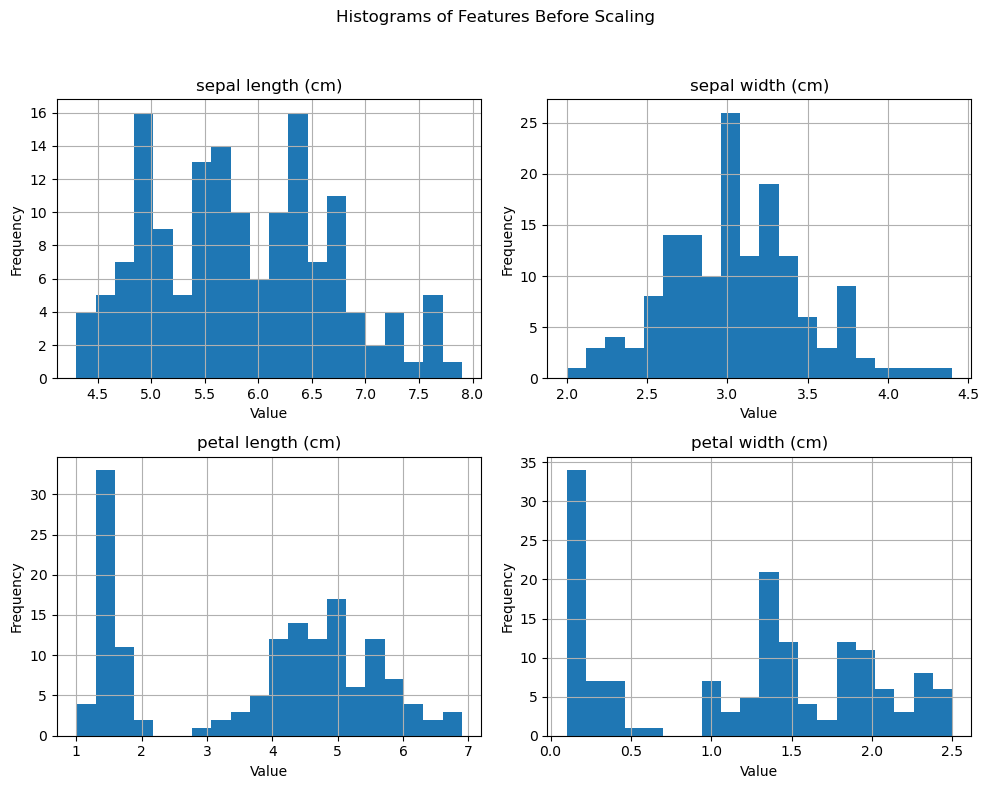

In [14]:
# Consider what the current data looks like before scaling
# This helps visualize any skewed distributions and outlier data points


# Plot before scaling
axes = X.hist(figsize=(10, 8), bins=20)

# Iterate over each subplot and set the titles
for ax in axes.flatten():
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')


# Adjust the padding to make room for the suptitle
plt.suptitle('Histograms of Features Before Scaling')
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


In [15]:
# Split dataset into training set and test set
# The testing size is 20% of the data and the training size is 80% of the data.
# 42 is a random number used reproducibility, helping to ensure consistent results for each instance ran.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

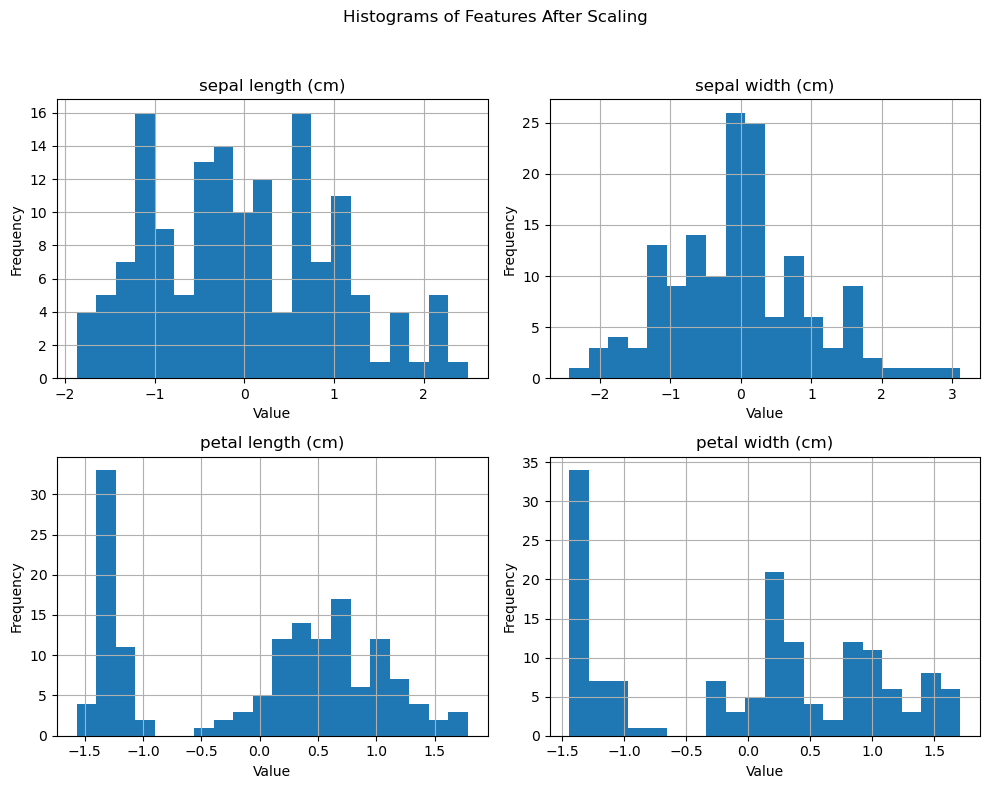

In [17]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier plotting

X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Plot histograms
axes = X_scaled_df.hist(figsize=(10, 8), bins=20)

# Label each subplot's axes
for ax in axes.flatten():
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Add title and layout adjustments
plt.suptitle('Histograms of Features After Scaling')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [18]:
# Create KNN classifier

# Number of neighbors
k = 5 
knn = KNeighborsClassifier(n_neighbors=k)

In [19]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Now, let's make predictions on the test data
y_pred = knn.predict(X_test)

In [21]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [22]:
# The confusion matrix result interprets for true instances of each iris variety: setosa, versicolor, and virginica, respectively.
# 10 instances of setosa were correctly predicted.
# 9 instances of versicolor were correctly predicted.
# Finally, 11 instances of virginica were correctly predicted.

# In summation, all instances in the test set were predicted correctly and the classifier did not make any mistakes.
# Since there were no zero values outside of the diagonal, this means no false positives occurred.
# Since there were no misclassifications, this means no false negatives occurred.

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [24]:
# The classification report summarizes how well the classifier did in precision, recall, and F1 score. 
# The support column represents the number of occurrences of each class in the test data set.

# Precision score of 1.0 means 100% correct prediction for the iris variety.
# A recall score of 1.0 means the model 100% correctly identified the iris variety each time.
# F1 score is the mean between precision and recall. A score of 1.0 means the classifier is balanced in both precision and recall.

## We performed KNN analysis. Let's move on to k-Means clustering.

In [26]:
# KMeans Initialization: This initializes a KMeans clustering model object.
scaler = StandardScaler() 

# Below fits the KMeans model to the data while assigning each data point to a cluster.
X_scaled = scaler.fit_transform(X)  

In [27]:
# We have 3 clusters as there are 3 species. 42 is a random number used to ensure
# consistent results of random initialization for every instance the code is ran.
kmeans = KMeans(n_clusters=3, random_state=42) 

#This line fits the KMeans model to the data and assigns a cluster for each data point.
#Creating clusters visualizes colored groups for each species.

clusters = kmeans.fit_predict(X_scaled) 

In [28]:
# First, load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [29]:
# Below calculates the silhouette score as mentioned above. It evaluates the correctness of fit for each point's assigned cluster.

silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.479


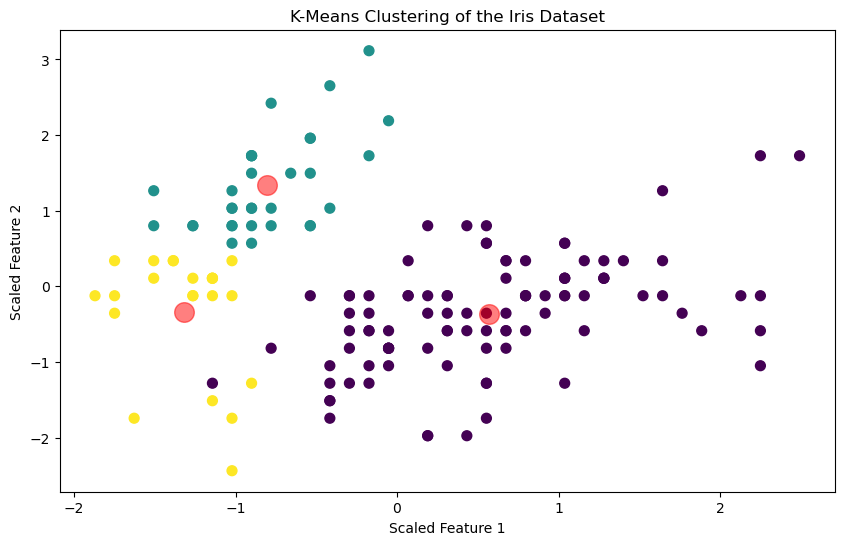

In [30]:
# Let's see the visualization of KKN Means

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('K-Means Clustering of the Iris Dataset')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()

In [31]:
# The red centers above are centroids AKA the mean position or "average position" of all data points between each cluster. 
# The data seems to have weak clustering between each group for each feature of width/lengths.
# This is shown through the dispersion amongst points spread across the groups.
# Let's take a more granular look at the sepal length/width and petal length/width among the 3 species.

In [32]:
# Import the required libraries 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

In [33]:
# Get the required feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
# Get the measurement data
iris.data

# Print only the first 10 rows
print(iris.data[:10]) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [35]:
# Let's get the species names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
# We want to know which species each data point corresponds to
# The species are assigned to integer values - setosa is 0, verisicolor is 1, and virginica is 2
# The species are associated w/ these integers for the classifier to reference when computing tasks
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
# Now, let's create a dataframe
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
# Get the column names
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [39]:
# We initially stored the species with assinged numbers, but since we need to further interpret the data, we will now 
# assign categorical numbers to proceed w/ our visualizations.
iris_df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


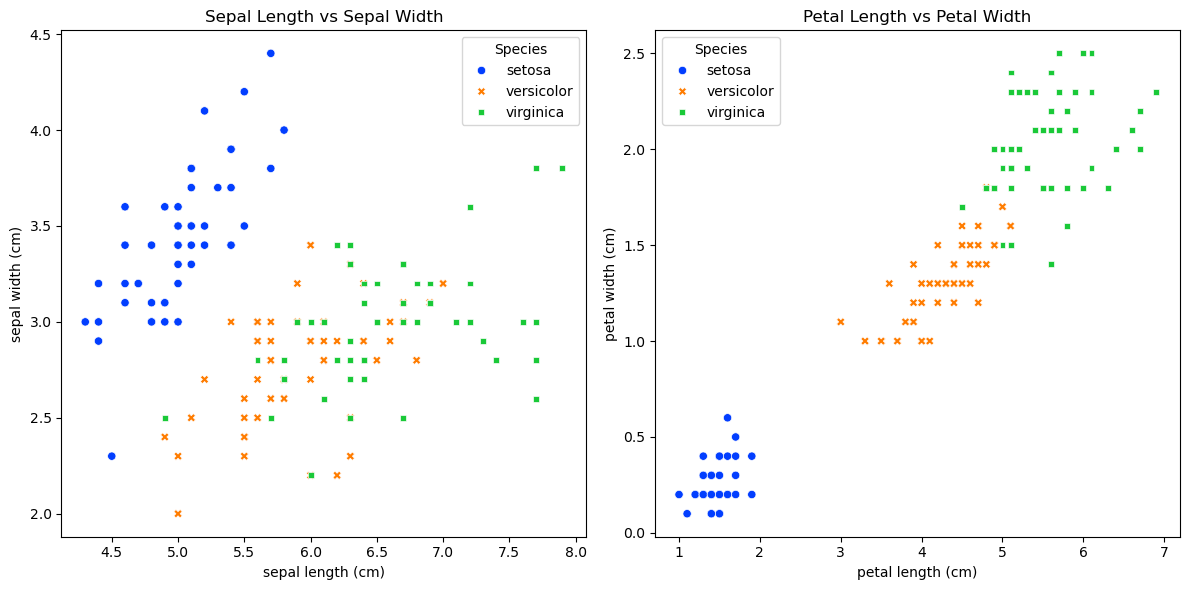

In [40]:
# Plotting Sepal Length vs Sepal Width
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Species', data=iris_df, style='Species', palette='bright')
plt.title('Sepal Length vs Sepal Width')

# Plotting Petal Length vs Petal Width
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='Species', data=iris_df, style='Species', palette='bright')
plt.title('Petal Length vs Petal Width')

plt.tight_layout()
plt.show()

### Conclusions


In [42]:
# The KNN algorithm is sensitive to feature scales. To combat this sensitivity and ensure the data is interpreted correctly,
# We scale the data using StandardScaler, transforming each feature to have a mean of 0 and a standard deviation of 1.
# Scaling is a must because the features we work with can all have different units, ranges, and distributions. 
# Doing so enforces equal contribution of all features by putting them on the same footing, which can 
# lead to better algorithm interpretability and performance.
# Scaling prevents emphasis on features that may have large numbers.

In [43]:
# The K Means visualization shows only a moderate structure between the data. We also only received a result of 
# Silhouette Score: 0.480
# This demonstrates that unsupervised clustering isn't the greatest method for separating the iris species.
# Using supervised classification methods would be more useful.

In [44]:
# As shown in the subplots for K Means clustering, setosa can be distinctly picked out of the 3 iris varieties.
# On the other hand, there is overlap between virginica and versicolor, suggesting there can be some difficulty in telling the two species apart.

# When it comes to petal dimensions, each species has distinct clustering occurring.
# However, sepal dimensions are only distinct for setosas while there is overlap between versicolor and virginica.
# Since sepal dimensions show limited separability, this can introduce noise in the classification model.
# Dimensionality reduction or feature engineering could improve the separability of the virginica and versicolor species.

# Between using sepal dimensions and petal dimensions for predicting flower species, it would be best to use petal dimensions.

###  References
   - Academic (if any)
   - Online (if any)
	

In [ ]:
# Ronald Fisher's iris dataset

### Credits

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. 
> *This code is based on .... (if any)*

# NA

In [49]:
# End of Project